In [18]:
import numpy as np
import cv2
import sys; sys.path.append('../')
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from numpy.fft import ifft2,fft2,fft,ifft,fftfreq, fftshift, ifftshift
from mpl_toolkits.axes_grid1 import make_axes_locatable
# use latex for rendering plots
plt.rc('text',usetex=True)
plt.rc('font',family='serif',size=9)
plt.rc('figure', facecolor='white')

In [19]:
img_a = cv2.imread('pru_mono_homework.png')/255.0
img_b = cv2.imread('pru_mono_detail_1_homework.png')/255.0
img_c = cv2.imread('pru_mono_detail_2_homework.png')/255.0
# change it into the gray scale
img_a = np.mean(img_a,axis=-1)
img_b = np.mean(img_b,axis=-1)
img_c = np.mean(img_c,axis=-1)
print(img_a.shape)

(660, 660)


## Problem (a)

In [20]:
fftimg_a = fft2(img_a)
fftimg_b = fft2(img_b)
fftimg_c = fft2(img_c)

In [31]:
### shift the FFT so zero frequency is centered
fftimg_shifted_a = fftshift(fftimg_a)
fftimg_shifted_b = fftshift(fftimg_b)
fftimg_shifted_c = fftshift(fftimg_c)

print(fftimg_shifted_b.shape)

(200, 200)


In [22]:
### generate the frequency ticks
def get_shifted_freqs(img):
    """Gets the k_r and k_c values for a given image."""
    n_rows, n_cols = img.shape
    k_r = fftfreq(n_rows)
    k_c = fftfreq(n_cols)
    k_r_shifted = fftshift(k_r) * n_rows
    k_c_shifted = fftshift(k_c) * n_cols
    return k_r_shifted, k_c_shifted

In [23]:
k_r_a, k_c_a = get_shifted_freqs(img_a)
k_r_b, k_c_b = get_shifted_freqs(img_b)
k_r_c, k_c_c = get_shifted_freqs(img_c)

### plot data

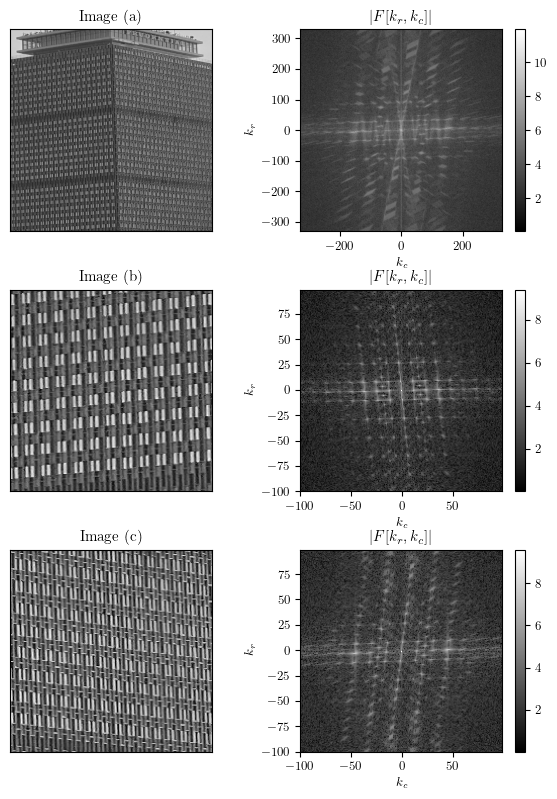

In [24]:
### plot the data
fig, axes = plt.subplots(3,2,figsize=(6,8))

ax0 = axes[0,0].imshow(img_a, cmap='gray')
axes[0,0].set_title('Image (a)')
axes[0,0].set_xticks([])
axes[0,0].set_yticks([])

ax1 = axes[0,1].imshow(np.log(np.abs(fftimg_shifted_a)+1), cmap='gray', extent=(k_c_a[0],k_c_a[-1],k_r_a[0],k_r_a[-1]))
axes[0,1].set_title(r'$ | F[k_r,k_c] | $')
cbar = fig.colorbar(ax1, ax=axes[0,1])
axes[0,1].set_xlabel('$k_c$')
axes[0,1].set_ylabel('$k_r$')

ax2 = axes[1,0].imshow(img_b, cmap='gray')
axes[1,0].set_title('Image (b)')
axes[1,0].set_xticks([])
axes[1,0].set_yticks([])

ax3 = axes[1,1].imshow(np.log(np.abs(fftimg_shifted_b)+1), cmap='gray', extent=(k_c_b[0],k_c_b[-1],k_r_b[0],k_r_b[-1]))
axes[1,1].set_title(r'$ | F[k_r,k_c] | $')
cbar2 = fig.colorbar(ax3,ax=axes[1,1])
axes[1,1].set_xlabel('$k_c$')
axes[1,1].set_ylabel('$k_r$')

ax4 = axes[2,0].imshow(img_c, cmap='gray')
axes[2,0].set_title('Image (c)')
axes[2,0].set_xticks([])
axes[2,0].set_yticks([])

ax5 = axes[2,1].imshow(np.log(np.abs(fftimg_shifted_c)+1), cmap='gray', extent=(k_c_c[0],k_c_c[-1],k_r_c[0],k_r_c[-1]))
axes[2,1].set_title(r'$ | F[k_r,k_c] | $')
cbar3 = fig.colorbar(ax5,ax=axes[2,1])
axes[2,1].set_xlabel('$k_c$')
axes[2,1].set_ylabel('$k_r$')

plt.tight_layout()
plt.show()

## Problem (b)

In [25]:
# ####define your own 2D-kernel
kernel = np.array([[0,0,0],[1,1,1],[0,0,0]])
print(kernel.shape)

(3, 3)


In [26]:
# ####Calculate the blurred image.
blur_img = convolve2d(img_b,kernel)
blur_img.shape, img_b.shape

((202, 202), (200, 200))

In [29]:
# #### Calculate the fft of the blurred image
fftblur_img = fftshift(fft2(blur_img))
fftblur_img.shape

(202, 202)

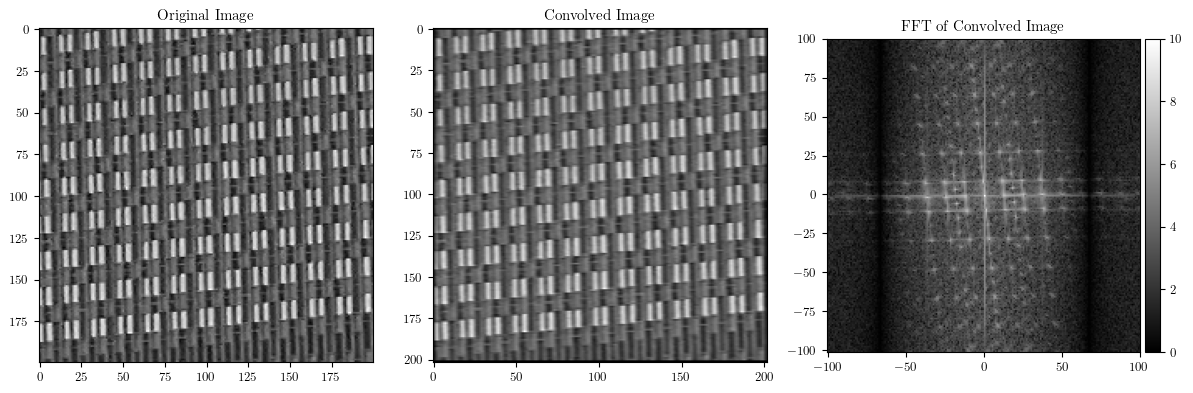

In [56]:
fig2, ax = plt.subplots(1,3,figsize=(12,8))

ax[0].imshow(img_b, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(blur_img, cmap='gray')
ax[1].set_title('Convolved Image')
k_r,k_c = get_shifted_freqs(fftblur_img)
ax2 = ax[2].imshow(np.log(np.abs(fftblur_img)+1), cmap='gray', extent=(k_c[0],k_c[-1],k_r[0],k_r[-1]),clim=(0,10))
ax[2].set_title('FFT of Convolved Image')
divider = make_axes_locatable(ax[2])
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = fig2.colorbar(ax2, cax=cax)

plt.tight_layout()
plt.show()

## Problem (c)

In [36]:
# #### Calculate the fft of the kernel
desired_size = fftimg_shifted_c.shape[0]
top_pad = bottom_pad = left_pad = right_pad = (desired_size - kernel.shape[0])//2
padded_kernel = np.pad(kernel,((top_pad+1,bottom_pad),(left_pad+1,right_pad)), 'constant', constant_values=(0,0))[0:desired_size,0:desired_size]
fftkernel = fftshift(fft2(padded_kernel))

fftkernel.shape

(200, 200)

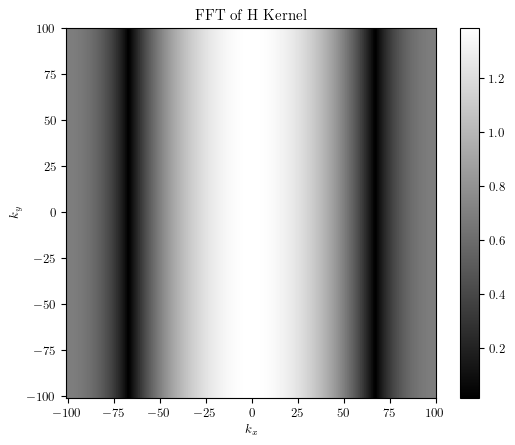

In [45]:
plt.figure()
plt.imshow(np.log(np.abs(fftkernel)+1), cmap='gray', extent=(k_c[0],k_c[-1],k_r[0],k_r[-1]))
plt.title('FFT of H Kernel')
plt.xlabel('$k_x$')
plt.ylabel('$k_y$')
plt.colorbar()
plt.show()

In [46]:
kernelfft_multiplied_with_fftc = fftimg_shifted_c * fftkernel

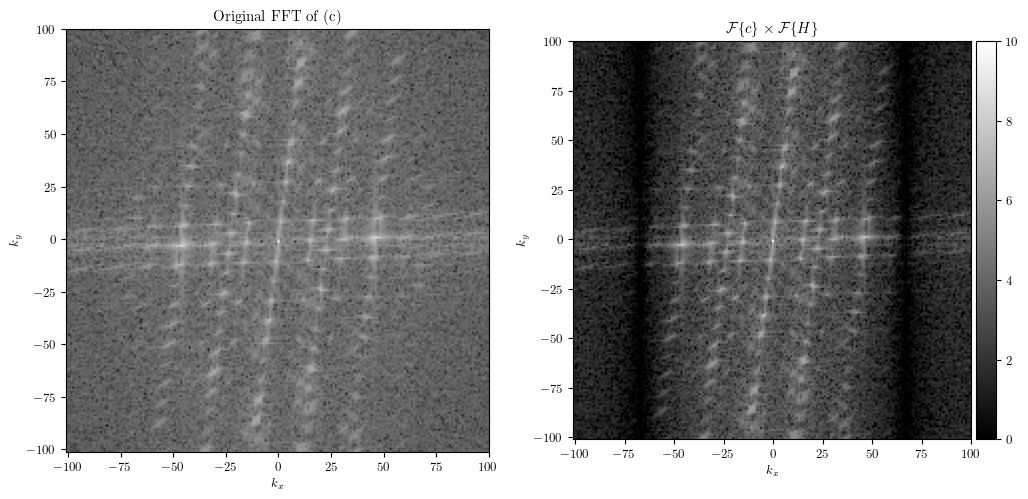

In [55]:
fig3, axs = plt.subplots(1,2,figsize=(12,8))
axs[0].imshow(np.log(np.abs(fftimg_shifted_c+1)), cmap='gray', extent=(k_c[0],k_c[-1],k_r[0],k_r[-1]))
axs[0].set_title('Original FFT of (c)')
axs[0].set_xlabel('$k_x$')
axs[0].set_ylabel('$k_y$')
ax1 = axs[1].imshow(np.log(np.abs(kernelfft_multiplied_with_fftc+1)), cmap='gray', extent=(k_c[0],k_c[-1],k_r[0],k_r[-1]), clim=(0,10))
axs[1].set_title('$\mathcal{F}\{c\} \\times \mathcal{F}\{H\}$')
axs[1].set_xlabel('$k_x$')
axs[1].set_ylabel('$k_y$')
divider = make_axes_locatable(axs[1])
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = fig2.colorbar(ax1, cax=cax)
plt.show()


## Problem (d)

In [57]:
# define the new kernel
H_big = np.array([[0, 0, 0, 0, 0],
                   [0, 0, 0, 0, 0],
                   [1, 1, 1, 1, 1],
                   [0, 0, 0, 0, 0],
                   [0, 0, 0, 0, 0]])

In [59]:
# create the padded version of H_big
pad = (desired_size - H_big.shape[0])//2
H_big_padded = np.pad(H_big, ((pad+1,pad),(pad+1,pad)),'constant', constant_values=(0,0))

print(H_big_padded.shape)

(200, 200)


In [58]:
# perform the convolution manually using scipy convolve2d
convolved_b = convolve2d(img_b,H_big)
print(convolved_b.shape)

(204, 204)


In [61]:
# obtain the FFT of the convolved (b)
fftbig_blur_img = fftshift(fft2(convolved_b))
print(fftbig_blur_img.shape)
k_r_big, k_c_big = get_shifted_freqs(fftbig_blur_img)

(204, 204)


In [63]:
# obtain the fft of the big padded kernel
fftbig_kernel = fftshift(fft2(H_big_padded))

In [64]:
# obtain the FFT of convolved image by multiplying the FFT of kernel with the FFt of the image
fftmultiplication_big = fftimg_shifted_c * fftbig_kernel

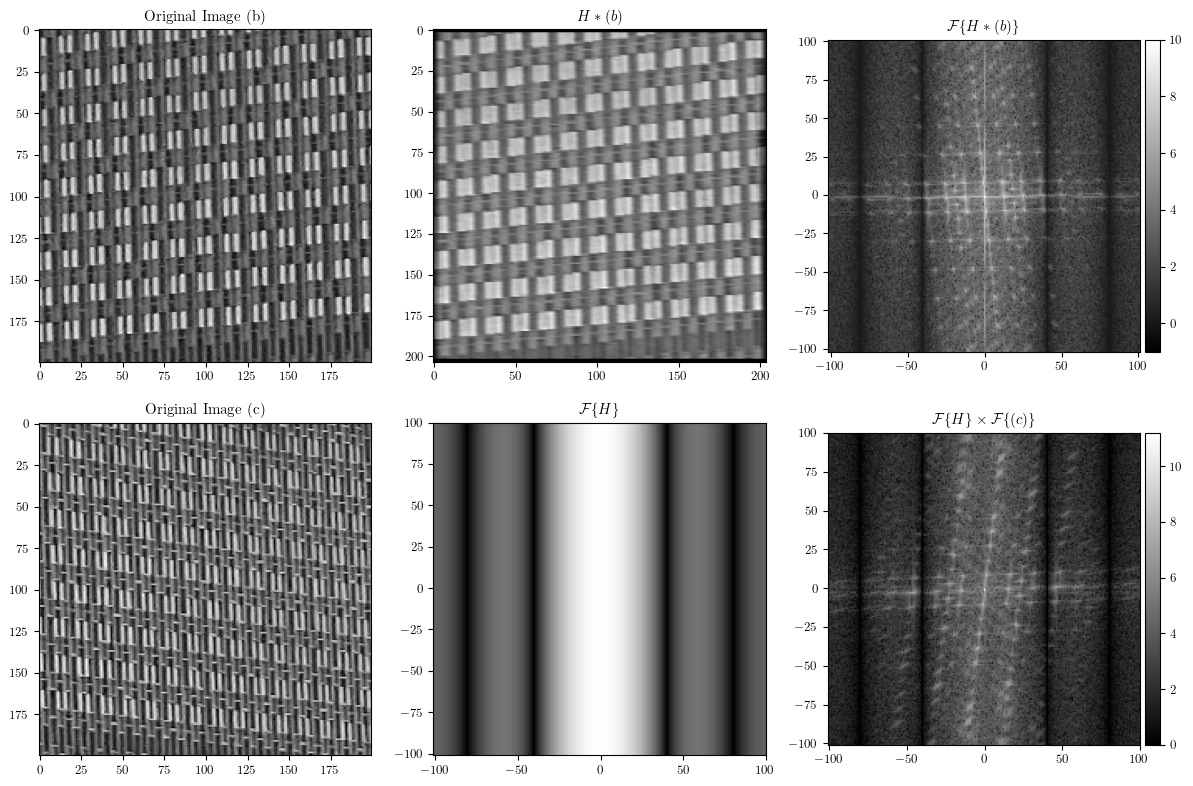

In [82]:
# plot the results!
fig4, aa = plt.subplots(2,3,figsize=(12,8))
aa[0,0].set_title('Original Image (b)')
aa[0,0].imshow(img_b,cmap='gray')
aa[0,1].set_title('$H * (b)$')
aa[0,1].imshow(convolved_b,cmap='gray')
aa[0,2].set_title('$\mathcal{F}\{H * (b)\}$')
row1 = aa[0,2].imshow(np.log(np.abs(fftbig_blur_img)+1),cmap='gray',clim=(-1,10),extent=(k_c_big[0],k_c_big[-1],k_r_big[0],k_r_big[-1]))
divider = make_axes_locatable(aa[0,2])
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = fig4.colorbar(row1, cax=cax)
aa[1,0].set_title('Original Image (c)')
aa[1,0].imshow(img_c,cmap='gray')
aa[1,1].set_title('$\mathcal{F}\{H\}$')
aa[1,1].imshow(np.log(np.abs(fftbig_kernel)+1),cmap='gray',extent=(k_c[0],k_c[-1],k_r[0],k_r[-1]))
aa[1,2].set_title('$\mathcal{F}\{H\} \\times \mathcal{F}\{(c)\}$')
row2 = aa[1,2].imshow(np.log(np.abs(fftmultiplication_big)+1),cmap='gray',extent=(k_c[0],k_c[-1],k_r[0],k_r[-1]))
divider = make_axes_locatable(aa[1,2])
cax = divider.append_axes("right", size="5%",pad=0.05)
cbar = fig4.colorbar(row2,cax=cax)

plt.tight_layout()
plt.show()